In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## **Fetch and explore data**



In [ ]:
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
print("Shape of the DataFrame:")
print(df.shape)
print("\nColumn names:")
print(df.columns)
print("\nFirst 5 rows of the DataFrame:")
display(df.head())
print("\nSummary information of the DataFrame:")
df.info()
print("\nDescriptive statistics of the DataFrame:")
display(df.describe())

/tmp/ipython-input-1429116751.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Shape of the DataFrame:
(1006, 5)

Column names:
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

First 5 rows of the DataFrame:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200



Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB

Descriptive statistics of the DataFrame:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,138.377810,139.863375,136.743542,138.247375,9.895373e+07
std,33.459340,33.579798,33.319773,33.453056,5.439610e+07
min,54.378586,55.379539,51.528419,55.277748,2.404830e+07
25%,120.763411,122.008181,119.225824,120.869273,6.407675e+07
50%,143.251007,144.829627,141.584391,143.100276,8.467540e+07
75%,163.691662,165.974619,162.434227,163.960256,1.155069e+08
max,196.669769,198.168786,195.567849,196.580427,4.265100e+08


## **Visualize the data**


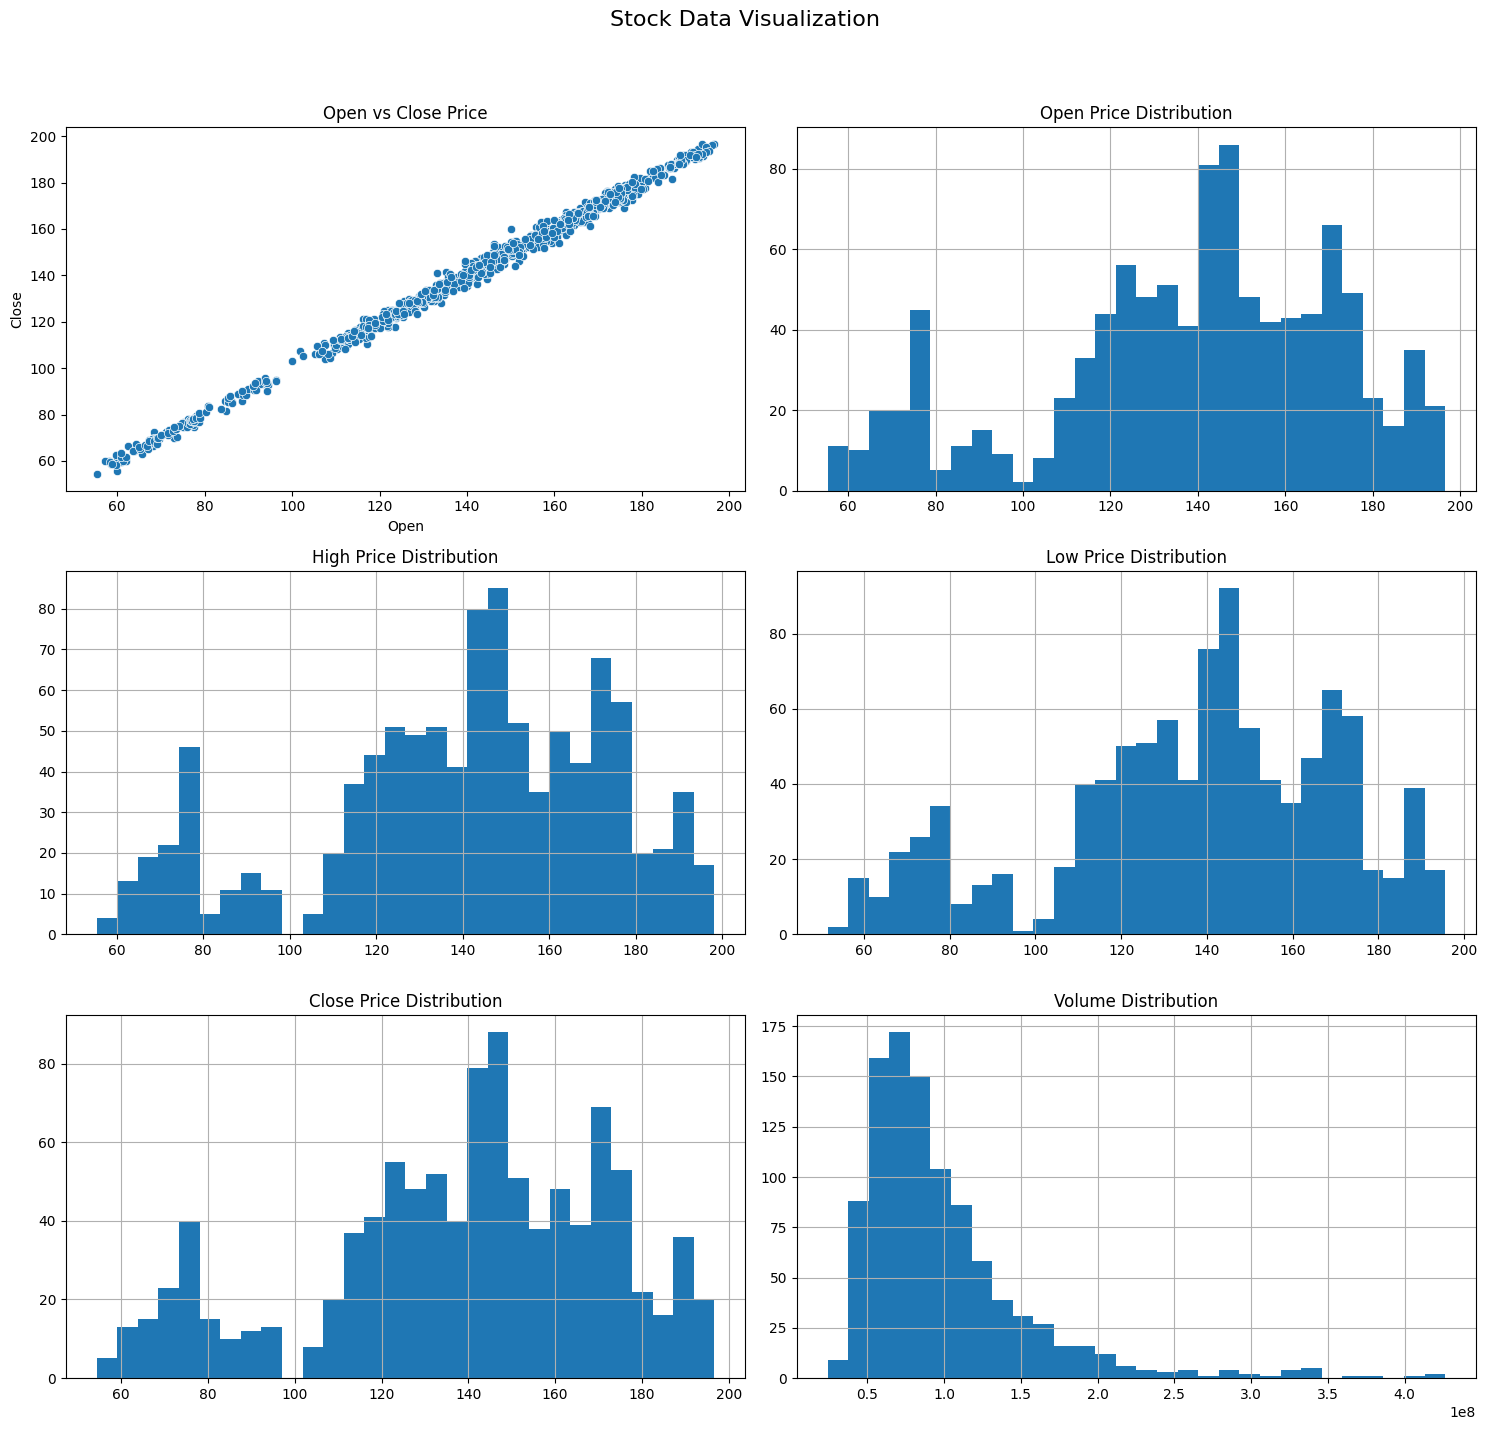

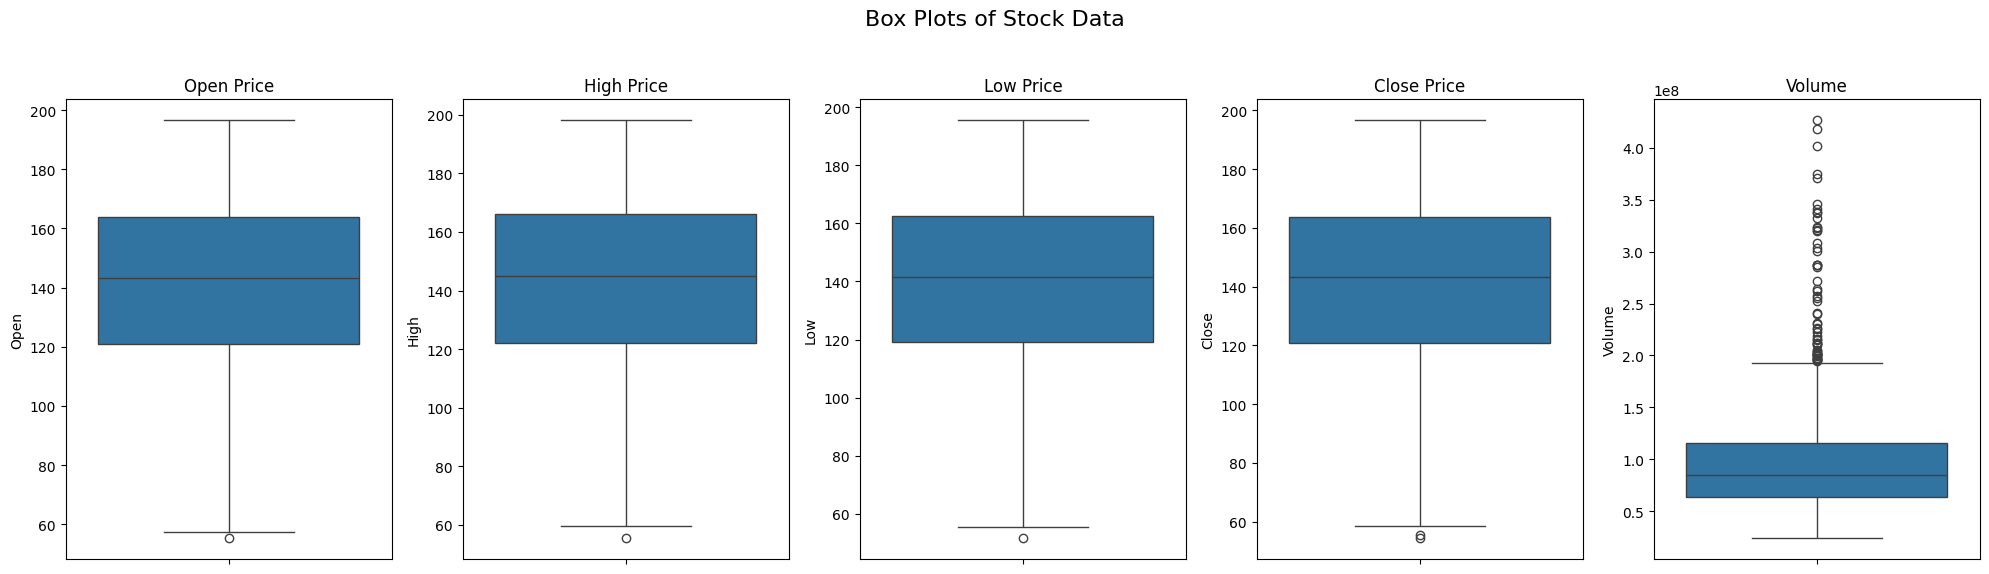

In [ ]:
# Flatten the multi-level column index
df.columns = df.columns.get_level_values(0)

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Stock Data Visualization', fontsize=16)

# Scatter plot of Open vs Close
sns.scatterplot(data=df, x='Open', y='Close', ax=axes[0, 0])
axes[0, 0].set_title('Open vs Close Price')

# Histograms
df['Open'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Open Price Distribution')
df['High'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('High Price Distribution')
df['Low'].hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Low Price Distribution')
df['Close'].hist(ax=axes[2, 0], bins=30)
axes[2, 0].set_title('Close Price Distribution')
df['Volume'].hist(ax=axes[2, 1], bins=30)
axes[2, 1].set_title('Volume Distribution')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Box Plots of Stock Data', fontsize=16)

sns.boxplot(y=df['Open'], ax=axes[0])
axes[0].set_title('Open Price')
sns.boxplot(y=df['High'], ax=axes[1])
axes[1].set_title('High Price')
sns.boxplot(y=df['Low'], ax=axes[2])
axes[2].set_title('Low Price')
sns.boxplot(y=df['Close'], ax=axes[3])
axes[3].set_title('Close Price')
sns.boxplot(y=df['Volume'], ax=axes[4])
axes[4].set_title('Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **Prepare data for modeling**


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (804, 4)
Shape of X_test: (202, 4)
Shape of y_train: (804,)
Shape of y_test: (202,)


## **Train a model**



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## **Make predictions and evaluate**


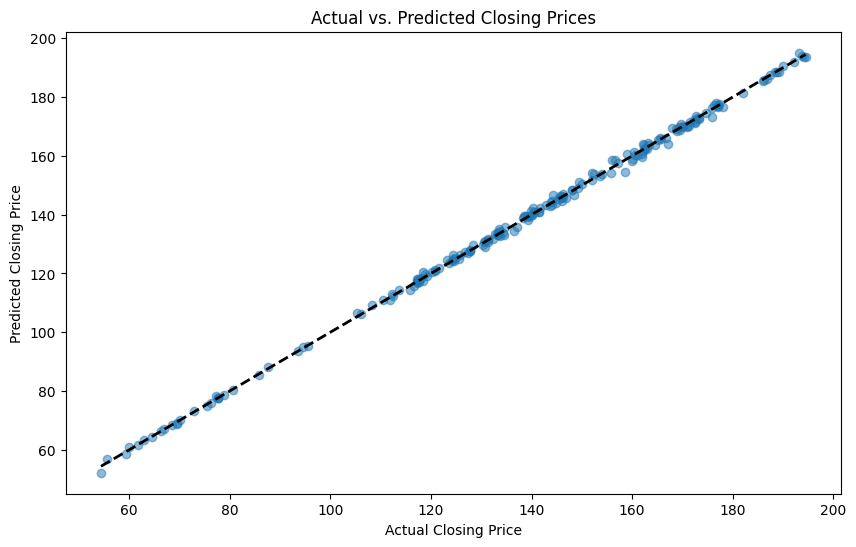

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Prices')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 0.7031574725849167
Mean Squared Error (MSE): 0.9069386109923988
R-squared: 0.9991804332706383


## **Summary:**

* The historical stock data for Apple Inc. (ticker: `AAPL`) was successfully downloaded from Yahoo Finance for the period from January 1, 2020, to December 31, 2023. The dataset contains 1006 rows and 5 columns: `Close`, `High`, `Low`, `Open`, and `Volume`.
* The data was split into training and testing sets, with 80% of the data used for training and 20% for testing.
* The scatter plot of actual vs. predicted closing prices shows a strong positive correlation, with the data points clustering closely around the diagonal line. This indicates that the model has a high degree of accuracy in predicting the closing price based on the given features.
* The box plots helped in identifying potential outliers, particularly in the `Volume` data.



In [ ]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df = df.dropna()

X = df[['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("After Feature Engineering:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

After Feature Engineering:
Mean Absolute Error (MAE): 0.7295309146951995
Mean Squared Error (MSE): 0.8887607917524804
R-squared: 0.9989885361471869
